## The Sparks Foundation Graduate Rotational Internship Program (GRIP).

### ---- Data Science and business Analytics Internship [Septemper 22] ----


## Task2: Prediction Using Unsupervised ML


## by: Eslam Shaban



#### Task Description: 
-     From the iris dataset, Predicting The Optimal Number of Clusters using elbow method 
- ##### elbow method:
     which means we will calculate WCSS: is the sum of squared distance between each point and the centroid in a cluster


### 01- Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline

### 02- Load The iris dataset

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Adding target to df
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 03- View The flowers to be easy to understand what is sepal and petal

In [5]:
# import image module
from IPython.display import Image
# get the image
Image(url="img/petal_sepal.png", width=300, height=300)

In [6]:
# get the image
Image(url="img/flowers.png", width=700, height=500)

### 04- Visualizing the data

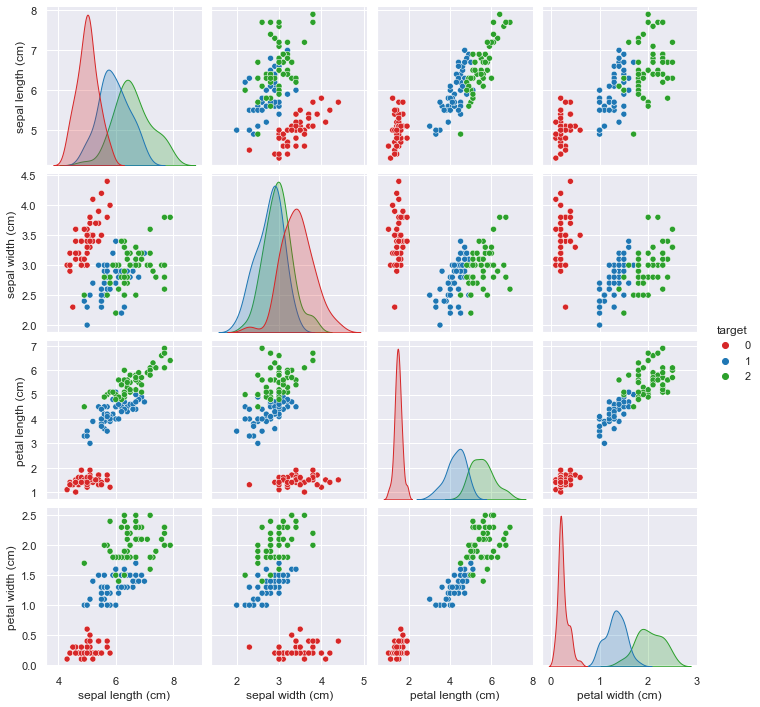

In [7]:
sns.set()
sns.pairplot(df, hue="target", palette=['tab:red','tab:blue','tab:green'])

### 05- How do you find the optimum number of clusters for K Means? How does one determine the value of K

C:\Users\future\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


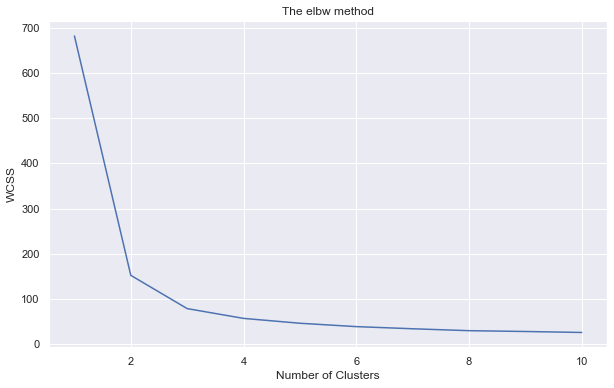

In [8]:
X = df.iloc[:,[0,1,2,3]].values
WCSS=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.subplots(figsize=(10,6))
plt.plot(range(1,11), WCSS)
plt.title("The elbw method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## 06- Fitting and Predicting

In [9]:
# from elbow method : the best K cluster = 3
kmeans = KMeans(n_clusters=3, init="k-means++" ,n_init=10,max_iter=300, random_state=0)
y_kmeans = kmeans.fit_predict(X)

### 07-  Visualizing the Clusters

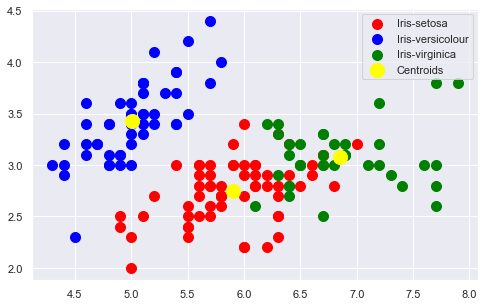

In [10]:
plt.subplots(figsize=(8,5))
#plot Clusters
plt.scatter(x= X[y_kmeans==0, 0], y= X[y_kmeans==0, 1], c="red", label='Iris-setosa', s=100)
plt.scatter(x= X[y_kmeans==1, 0], y= X[y_kmeans==1, 1], c="blue", label='Iris-versicolour', s=100)
plt.scatter(x= X[y_kmeans==2, 0], y= X[y_kmeans==2, 1], c="green", label='Iris-virginica', s=100)
#plot clusters centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids',s = 200)
plt.legend()
plt.show()

 
### ------------------------------------------------------

## Thank You !